# Business Case: Netflix - Data Exploration and Visualisation

# ** Problem Statement**


Netflix wants to understand what kind of shows/movies to produce and how to grow in different countries. Using the dataset of all available titles on Netflix, we aim to derive actionable insights and recommend content strategies using data.

# **Import Libraries & Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2025-05-10 15:59:02--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.169.117.64, 3.169.117.63, 3.169.117.127, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.169.117.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv.1’

netflix.csv.1       100%[===================>]   3.24M  --.-KB/s    in 0.04s   

2025-05-10 15:59:02 (91.1 MB/s) - ‘netflix.csv.1’ saved [3399671/3399671]



In [ ]:
df=pd.read_csv('netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **Data Overview & Cleaning**

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:

df['director'].fillna("Unknown_Value",inplace=True)
df['cast'].fillna("Unknown_Value",inplace=True)
df['country'].fillna("Unknown_Value",inplace=True)


<ipython-input-42-e84223180a08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown_Value",inplace=True)
<ipython-input-42-e84223180a08>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
df.dropna(subset=['date_added'],inplace=True)
df.dropna(subset=['rating'],inplace=True)
df.dropna(subset=['duration'],inplace=True)

In [ ]:
df.nunique()

,0
show_id,8790
type,2
title,8790
director,4527
cast,7679
country,749
date_added,1765
release_year,74
rating,14
duration,220


**Convert 'date_added' to datetime**

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')


## Convert 'rating', 'type', etc. to category

In [ ]:
df['type'] = df['type'].astype('category')


In [ ]:
df['rating'] = df['rating'].astype('category')

# **Non-Graphical Analysis**

In [ ]:
df['type'].value_counts()
df['country'].value_counts().head(10)
df['listed_in'].value_counts().head(10)
df['release_year'].value_counts().sort_index().tail(30)

,count
release_year,
1992,23
1993,28
1994,22
1995,25
1996,24
1997,38
1998,36
1999,39
2000,37


In [ ]:
df.nunique()

,0
show_id,8790
type,2
title,8790
director,4527
cast,7679
country,749
date_added,1697
release_year,74
rating,14
duration,220


# **Data Analysis and Data Visualization.**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_Value,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_Value,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_Value,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_Value,Unknown_Value,Unknown_Value,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_Value,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Q1. What is the distribution of content type (Movies vs. TV Shows)?**

<ipython-input-53-b9caf8cb1748>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df,  palette='Set2')


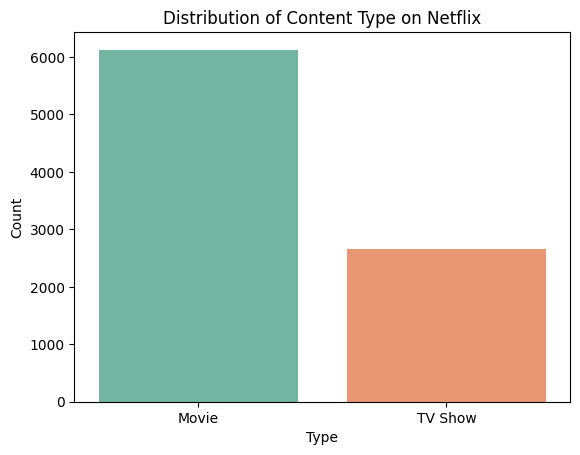

In [ ]:
sns.countplot(x='type', data=df,  palette='Set2')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

**Insight:** Netflix has added more movies than TV shows overall. However, if we look at the trend over the years, the number of TV shows being added has been increasing steadily.

## **Q2. How has the number of Movies and TV Shows released on Netflix changed over the years? (Bivariate Analysis)

<ipython-input-54-917ee76a4d8c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['release_year', 'type']).size().unstack()


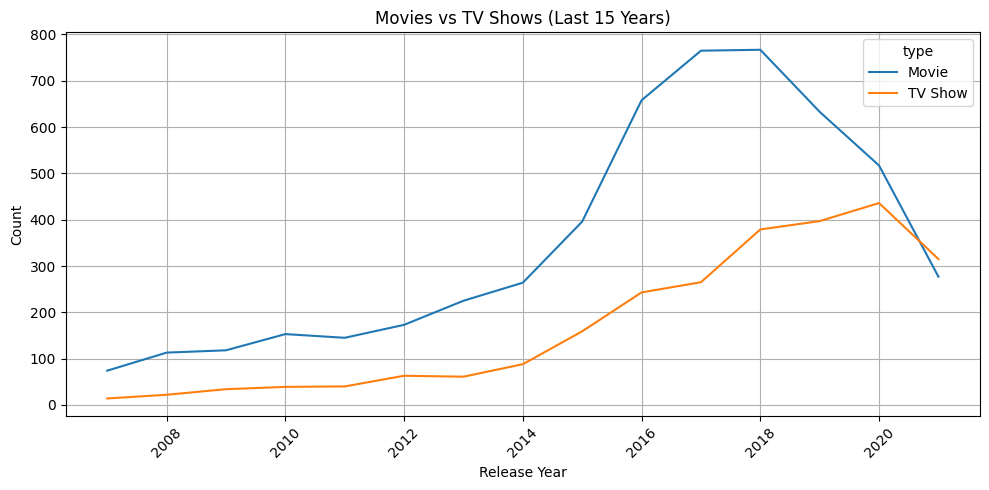

In [ ]:
df_grouped = df.groupby(['release_year', 'type']).size().unstack()
df_grouped_recent = df_grouped.tail(15)
df_grouped_recent.plot(kind='line', figsize=(10, 5), color=['#1f77b4', '#ff7f0e'])
plt.title("Movies vs TV Shows (Last 15 Years)")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Insights:** Netflix initially focused on movies, but has shifted towards TV show production, especially since 2016 to 2018.

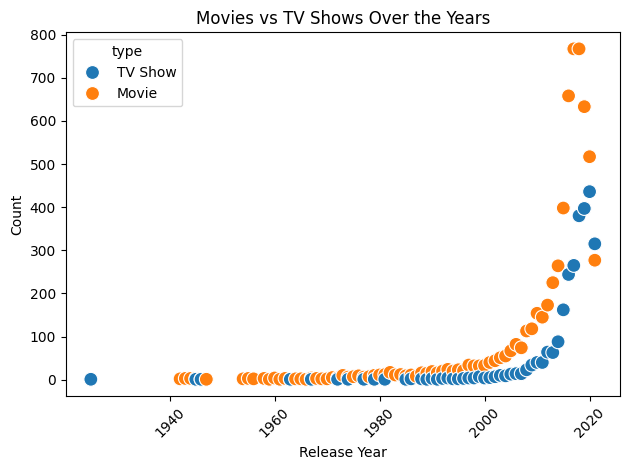

In [ ]:
df_grouped = df.groupby(['release_year', 'type']).size().reset_index(name='count')
sns.scatterplot(data=df_grouped, x='release_year', y='count', hue='type', palette=['#1f77b4', '#ff7f0e'], s=100)
plt.title("Movies vs TV Shows Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Q3. What are the Most Popular listed_in on Netflix? (Univariate - Categorical)**

In [ ]:
df_exploded_genre = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

<ipython-input-56-acfb40ea99f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='dark')


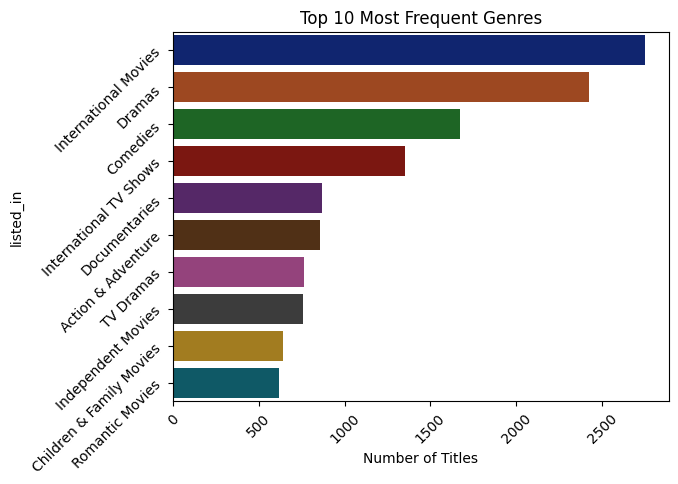

In [ ]:
top_genres = df_exploded_genre['genre'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='dark')
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Number of Titles")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("listed_in")
plt.show()

**Insight**: we can see in  above chart Drama, International Movies, and Comedies are most common and popular.


# **4. Which Countries Produce the Most Content on Netflix?**

In [ ]:
df_exploded_country = df.assign(country=df['country'].str.split(', ')).explode('country')

<ipython-input-57-f89f159c4486>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set1')


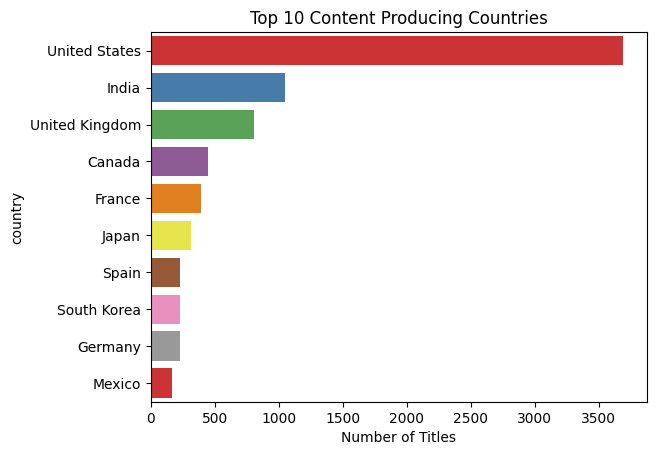

In [ ]:
top_countries = df_exploded_country['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='Set1')
plt.title("Top 10 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("country")
plt.show()

** Insight:** as per Chart and analysis USA, India and UK produced more content on Netflix.

# **When is the best time to launch content on Netflix?**

In [ ]:
df['month_added'] = df['date_added'].dt.month

In [ ]:
month_counts = df['month_added'].value_counts().sort_index()

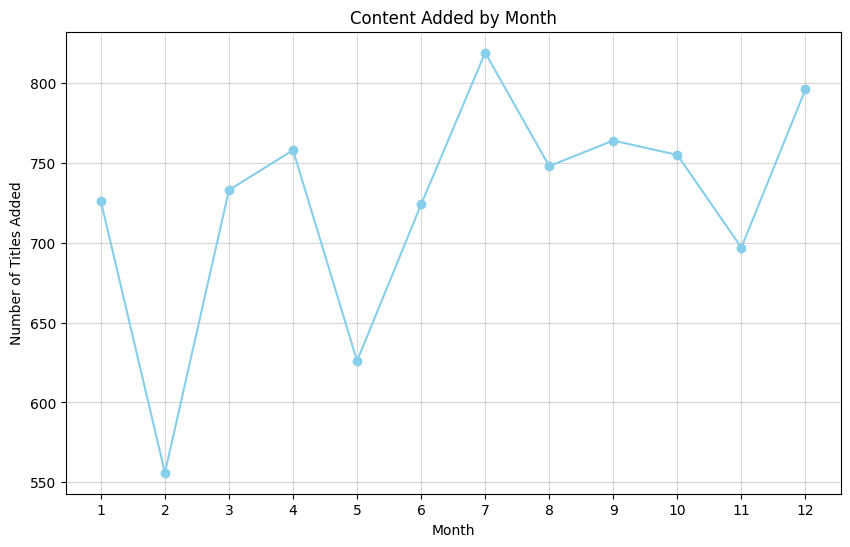

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(month_counts.index, month_counts.values, marker='o', linestyle='-', color='skyblue')
plt.title("Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(month_counts.index)  # Show all months on x-axis
plt.grid(True, alpha=0.5)
plt.show()

** Insight:** High releases in December, October, and September.**

# **Who are the most frequently featured actors on Netflix?**

In [ ]:
df_exploded_cast = df.assign(actor=df['cast'].str.split(', ')).explode('actor')

<ipython-input-48-1d74befe259b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors.index, x=top_actors.values, palette='mako')


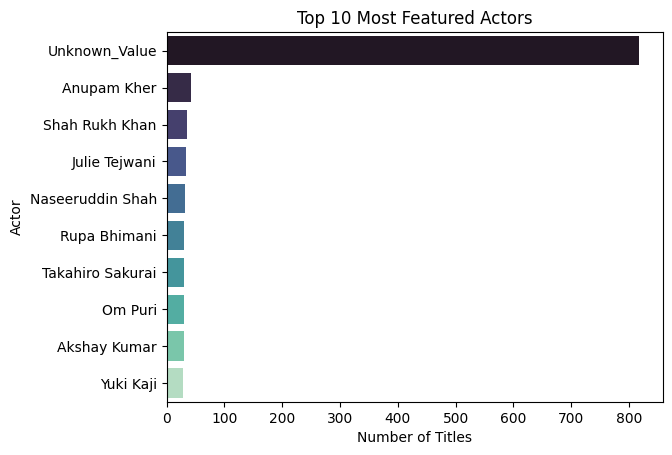

In [ ]:
top_actors = df_exploded_cast['actor'].value_counts().head(10)
sns.barplot(y=top_actors.index, x=top_actors.values, palette='mako')
plt.title("Top 10 Most Featured Actors")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

** Insight:** Indian and US actors are frequently cast.

# **What is the distribution of movie durations on Netflix?**

In [ ]:
df_movies = df[df['type'] == 'Movie']

In [ ]:
df_movies['minutes'] = df_movies['duration'].str.extract('(\d+)').astype(int)

<ipython-input-51-d32f7c0cf2ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['minutes'] = df_movies['duration'].str.extract('(\d+)').astype(int)


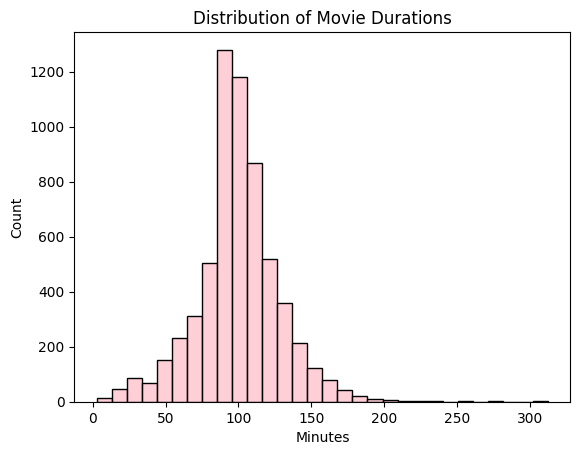

In [ ]:
sns.histplot(df_movies['minutes'], bins=30, color='pink')
plt.title("Distribution of Movie Durations")
plt.xlabel("Minutes")
plt.show()

** Insight:** Most movies 80–120 mins. Outliers >200 mins.

# **Has Netflix shifted its focus towards TV Shows in recent years?**

<ipython-input-59-ee04f122fa4f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recent_trend = recent.groupby(['release_year', 'type']).size().unstack()


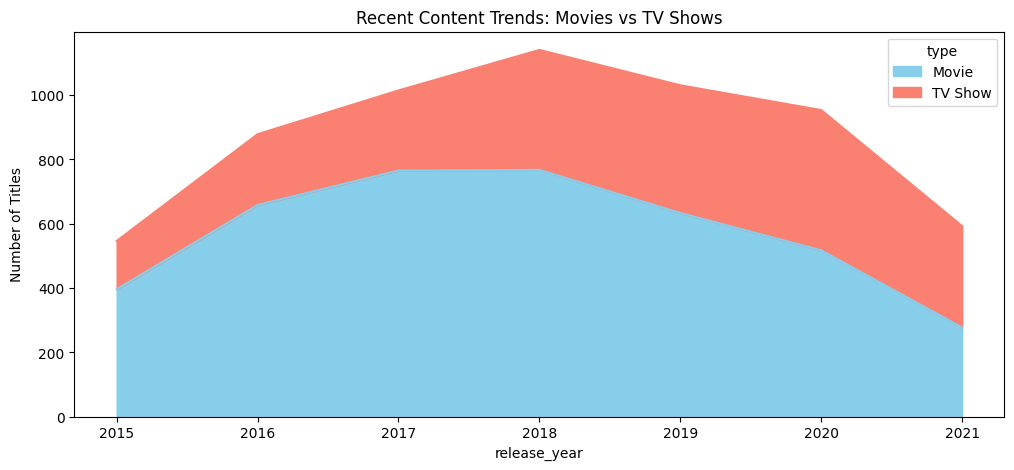

In [ ]:
recent = df[df['release_year'] >= 2015]
recent_trend = recent.groupby(['release_year', 'type']).size().unstack()
recent_trend.plot(kind='area', figsize=(12,5), color=['skyblue', 'salmon'])
plt.title("Recent Content Trends: Movies vs TV Shows")
plt.ylabel("Number of Titles")
plt.show()

** Insight:** TV Shows surge from 2016. Strategy shift.

What is the distribution of content ratings on Netflix? ***

In [ ]:
!pip install squarify
import squarify

In [ ]:
rating_counts = df['rating'].value_counts()
labels = rating_counts.index.tolist()
sizes = rating_counts.values.tolist()

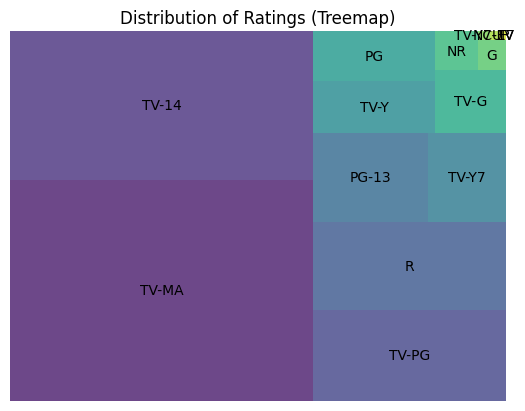

In [ ]:
squarify.plot(sizes=sizes, label=labels, alpha=.8, color=sns.color_palette('viridis', len(labels)))
plt.title("Distribution of Ratings (Treemap)")
plt.axis('off')
plt.show()

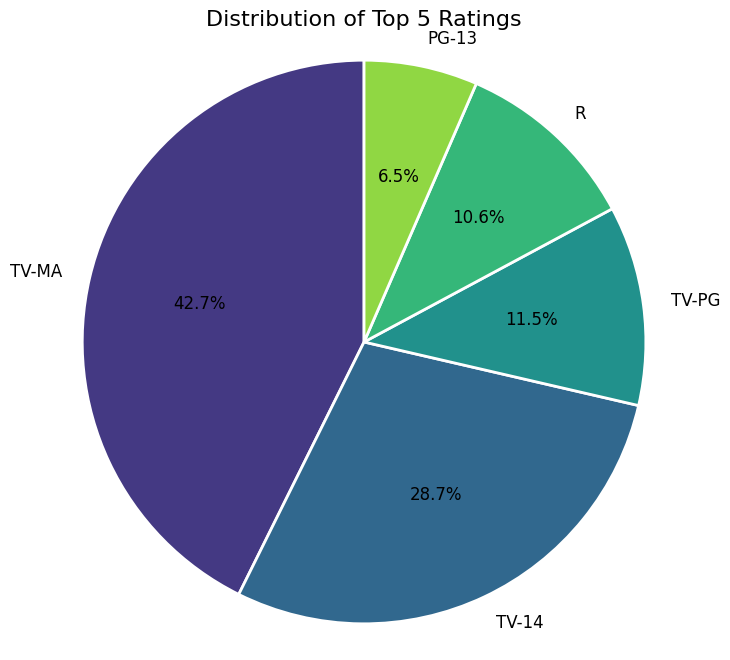

In [ ]:
top_5_ratings = df['rating'].value_counts().head(5)

# Customize plot appearance
plt.figure(figsize=(8, 8))
plt.pie(top_5_ratings,
        labels=top_5_ratings.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('viridis', len(top_5_ratings)),
        startangle=90,
        textprops={'fontsize': 12},
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

plt.title("Distribution of Top 5 Ratings", fontsize=16)
plt.axis('equal')

plt.show()

 **Insight:**TV-MA and TV-14 are the most frequent ratings.
These ratings target teens and adults.
This suggests Netflix's content strategy focuses on these audiences.

# **What is the correlation between the duration of movies (in minutes) and the year they were added to Netflix?**

In [ ]:
df_movies = df[df['type'] == 'Movie']

In [ ]:
df_movies['year_added'] = df_movies['date_added'].dt.year

<ipython-input-79-144c2e1a0b86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['year_added'] = df_movies['date_added'].dt.year


In [ ]:
df_movies['minutes'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)

<ipython-input-86-33618ac21afd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['minutes'] = df_movies['duration'].str.extract(r'(\d+)').astype(float)


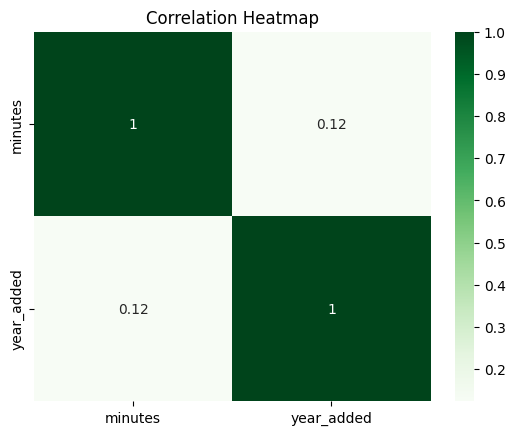

In [ ]:
sns.heatmap(df_movies[['minutes', 'year_added']].corr(), annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

** Insight:** No strong correlation. Feature engineering may be needed.

 Director, cast, and country fields had missing values.


### Business Insights**


=>Movies are still the most common, but TV Shows are growing fast and becoming more popular.

=>Drama and Comedy are the most popular genres worldwide, making them a good choice for future content.

=>December is a peak month for adding new content—possibly due to holidays and more viewers.

=>Most content comes from the US, India, and the UK, showing strong production from these countries and chances to grow through local partnerships.

=>A lot of content is made for adults, which means there's a good opportunity to create more shows and movies for kids.


# Recommendations**

1. Increase production of TV Shows, especially in drama/comedy listed_in.
2. Launch major titles in Q4 (Sept–Dec) to capitalize on viewership peaks.

4. Promote actors with proven Netflix presence to attract loyal viewers.
